In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# create 600x600 zero matrix
img = np.zeros((600, 600, 3))
img.shape

(600, 600, 3)

In [155]:
# choose vertices of triangle A, B, C
A = np.array((100, 100))
B = np.array((500, 100))
C = np.array((300, 500))  

# Define the color of A, B, C using numpy array
color_A = np.array((255, 0, 0))
color_B = np.array((0, 255, 0))
color_C = np.array((0, 0, 255))

In [156]:
# calculate area of triangle ABC
def area(a, b, c):
    return 0.5 * abs(a[0] * b[1] + b[0] * c[1] + c[0] * a[1] - a[1] * b[0] - b[1] * c[0] - c[1] * a[0])

In [157]:
def same_sign(a, b):
    return np.all(np.logical_or(np.logical_and(a >= 0, b >= 0), np.logical_and(a < 0, b < 0)))


def is_inside_triangle(p, a, b, c):
    cp_1 = np.cross(c - a, p - a)
    cp_2 = np.cross(b - a, p - a)
    cp_3 = np.cross(c - b, p - b)
    return same_sign(cp_1, cp_2) and same_sign(cp_2, cp_3)

In [158]:
# Create the array of all points in the triangle ABC using meshgrid
points = np.array(np.meshgrid(range(600), range(600))).T.reshape(-1, 2)
print(points.shape)
print (points)

(360000, 2)
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [599 597]
 [599 598]
 [599 599]]


In [159]:
# Calculate the color for each point in the triangle ABC not using for loop
# for each point in the triangle, calculate the area of the three sub-triangles
# and use the ratio of the area to calculate the color

# calculate the area of the three sub-triangles
area_ABC = area(A, B, C)
area_APC = area(A, points, C)
area_BPA = area(B, points, A)

# calculate the ratio of the area
ratio_A = area_APC / area_ABC
ratio_B = area_BPA / area_ABC
ratio_C = 1 - ratio_A - ratio_B

# calculate the color for each point
color = color_A * ratio_A[:, None] + color_B * ratio_B[:, None] + color_C * ratio_C[:, None]


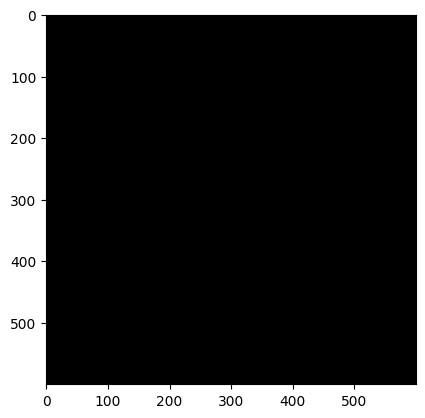

In [160]:
# using matplotlib to visualize img
plt.imshow(img.astype(np.uint8))
plt.show()